In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

## 0.4K

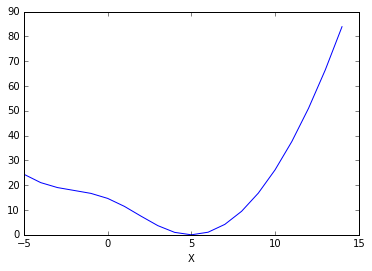

In [4]:
# r = np.arange(0.4, 30, 0.1)
P_t = 0
c = 299792458
f = 2.4 * 10**9

def P_r(r):
    P_r = P_t + 20 * np.log10(c / (4* np.pi* f* r))
    return P_r



Z = 2 # height of router - height of device

def chi_squared(Sis, x, y, routers=[], Z=2, sigma=1):
    chi = 0
    for i, (x_i, y_i) in enumerate(routers):
        S_i = Sis[i]
        r = math.sqrt((x - x_i)**2 + (y - y_i)**2 + Z**2)
        chi += ((P_r(r) - S_i)**2)/sigma**2
    return chi
    
def calculate_S_is(S_x, S_y, routers, noise):
    Sis = []
    for (x_i, y_i) in routers:
        if noise:
            mu = 0
            sigma = noise
            package_noise = np.random.normal(mu, sigma, 1)[0]
        else:
            package_noise = 0
        S_r = math.sqrt((S_x - x_i)**2 + (S_y - y_i)**2 + Z**2)

        S_i = P_r(S_r) + package_noise
        Sis.append(S_i)
    return Sis
  
routers = [(0,0), (0,20), (20,20), (20, 0)]
S_x = 5
S_y = 5
noise = 0
Sis = calculate_S_is(S_x, S_y, routers, noise)
 
chis = []
y=5
for x in range(-5, 15):
    chis.append(chi_squared(Sis,x, y, routers))
    
plt.plot(range(-5, 15), chis)
plt.xlabel("X")
plt.show()

The plot is above. The minimum is at x=5, y remains 5 for the entire time.

## 0.4l

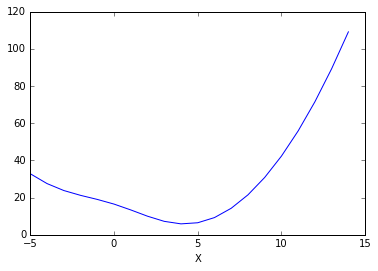

In [12]:
routers = [(0,0), (0,20), (20,20), (20, 0)]
S_x = 5
S_y = 5
noise = 1
Sis = calculate_S_is(S_x, S_y, routers, noise)
 
chis = []
for x in range(-5, 15):
    chis.append(chi_squared(Sis,x, y, routers))
    
plt.plot(range(-5, 15), chis)
plt.xlabel("X")
plt.show()

When the test is run several times the plot changes, although the minimum is generaly around x=5

## 0.4m

In [22]:
from scipy.optimize import minimize

routers = [(0,0), (0,20), (20,20), (20, 0)]
S_x = 5
S_y = 5
noise = 1
Sis = calculate_S_is(S_x, S_y, routers, noise)
 
chis = []
for x in range(-5, 15):
    chis.append(chi_squared(Sis,x, y, routers))

def chi_squared_xy(xy):
    x,y = xy
    chi = chi_squared(Sis,x, y, routers)
    return chi

x0 = [0,0]
res = minimize(chi_squared_xy, x0)
print( res.x )

[ 5.99257552  4.40708152]


Minimum is seen above.

## 0.4n
See answers in the plots.

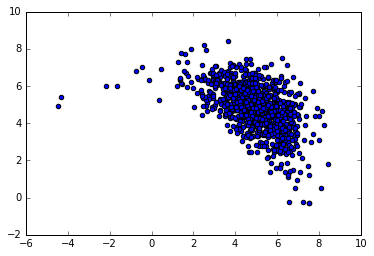

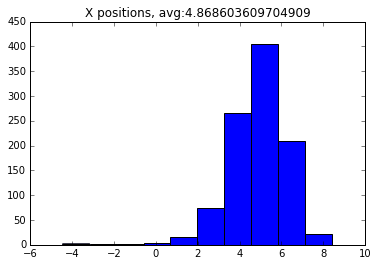

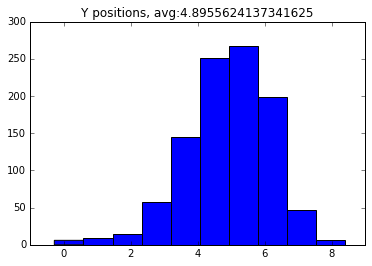

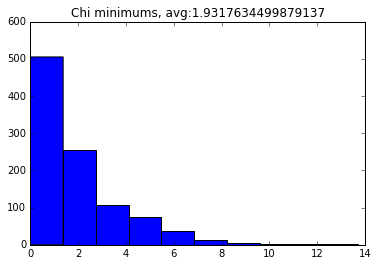

In [247]:
positions = []

routers = [(0,0), (0,20), (20,20), (20, 0)]
S_x = 5
S_y = 5
noise = 1
Sis = calculate_S_is(S_x, S_y, routers, noise)
 
def chi_squared_xy(xy):
    x,y = xy
    chi = chi_squared(Sis,x, y, routers)
    return chi

packets = range(1000)
xs = []
ys = []
min_chis = []
for packet in packets:
    Sis = calculate_S_is(S_x, S_y, routers, noise)
    x0 = [0,0]
    res = minimize(chi_squared_xy, x0)
    [x,y] = res.x
    min_chis.append(res.fun)
    xs.append(x)
    ys.append(y)

plt.scatter(xs, ys)
plt.show()

plt.hist(xs)
plt.title("X positions, avg:{}".format(np.mean(xs)))
plt.show()

plt.hist(ys)
plt.title("Y positions, avg:{}".format(np.mean(ys)))
plt.show()


plt.hist(min_chis)
plt.title("Chi minimums, avg:{}".format(np.mean(min_chis)))
plt.show()



## 0.4o
The $\chi^2$ minimum is around 2, so that corresponds with our NDoF which is also 2.

## 0.4p

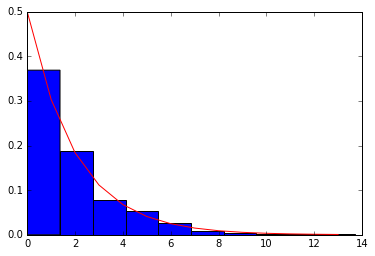

In [248]:
from scipy.stats import chi2
n, bins, patches = plt.hist(min_chis, normed=1)
mu = 0
k=2
dist = chi2(k, mu)
x = range(math.ceil(max(min_chis)))
plt.plot(x, dist.pdf(x), c='red')
plt.show()

Yes, it agrees

## 0.5q

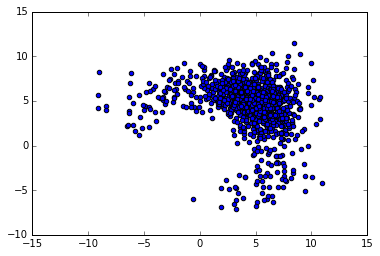

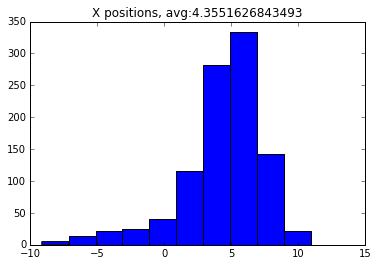

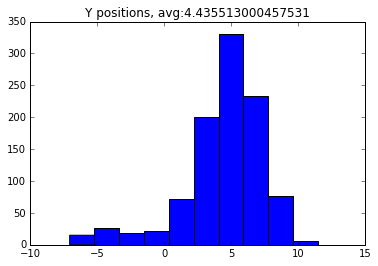

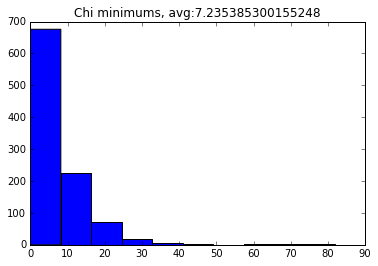

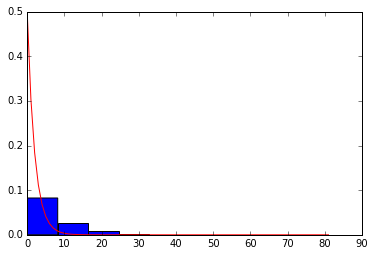

In [255]:
positions = []

routers = [(0,0), (0,20), (20,20), (20, 0)]
S_x = 5
S_y = 5
noise = 2
Sis = calculate_S_is(S_x, S_y, routers, noise)
 
def chi_squared_xy(xy):
    x,y = xy
    chi = chi_squared(Sis,x, y, routers, sigma=1)
    return chi

packets = range(1000)
xs = []
ys = []
min_chis = []
for packet in packets:
    Sis = calculate_S_is(S_x, S_y, routers, noise)
    x0 = [0,0]
    res = minimize(chi_squared_xy, x0)
    [x,y] = res.x
    min_chis.append(res.fun)
    xs.append(x)
    ys.append(y)

plt.scatter(xs, ys)
plt.show()

plt.hist(xs)
plt.title("X positions, avg:{}".format(np.mean(xs)))
plt.show()

plt.hist(ys)
plt.title("Y positions, avg:{}".format(np.mean(ys)))
plt.show()


plt.hist(min_chis)
plt.title("Chi minimums, avg:{}".format(np.mean(min_chis)))
plt.show()

n, bins, patches = plt.hist(min_chis, normed=1)
mu = 0
k=2
dist = chi2(k, mu)
x = range(math.ceil(max(min_chis)))
plt.plot(x, dist.pdf(x), c='red')
plt.show()



The cloud of estimate device positions has a larger spread compared to the Gaussian fluctuations of 1 dBm. Which is to be expected as we added more noise.
The avarage $\chi^{2}$ is just over 7. It seems that our distribution is now a bit flatter compared to the normal $\chi^2$ distribution.

R

If we have 10 degrees of freedom we would expect a $\chi^2$ of around 10. However when we have a $\chi^2$ of 40 that suggests the real fluctiations of nois is larger than we expected. As we see in the previous question we had a larger fluctuation than the expected fluctiation, which caused the $\chi^2$ to be too large. 